## Práctico 1 - Detección de Sarcasmo

En este primer trabajo nos enfocaremos en algunos de los conceptos abarcados por la materia de análisis y visualización pero con algunas particularidades especiales, debido a mque estaremos trabajando con lenguaje natural.

#### Consideración:
A lo largo del trabajo práctico se analizarán los comentarios sarcásticos por un lado y no sarcásticos por el otro
y luego se hará una comparación entre los mismos.


In [1]:
import io
import pandas as pd
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import csv
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Se unen los DataFrames para poder trabajar con todos los datos juntos
df1 = pd.read_csv('../datasets/GEN-sarc-notsarc.csv')
df2 = pd.read_csv('../datasets/HYP-sarc-notsarc.csv')
df3 = pd.read_csv('../datasets/RQ-sarc-notsarc.csv')

data = pd.concat([df1, df2, df3], ignore_index=True)
data = data.rename(columns={'class':'clasif',
                                   'id':'id', 'text':'text'})
data = pd.DataFrame(data, columns = ['clasif', 'id', 'text'])
print(data)

       clasif    id                                               text
0     notsarc     1  If that's true, then Freedom of Speech is doom...
1     notsarc     2  Neener neener - is it time to go in from the p...
2     notsarc     3  Just like the plastic gun fear, the armour pie...
3     notsarc     4  So geology is a religion because we weren't he...
4     notsarc     5  Well done Monty. Mark that up as your first ev...
...       ...   ...                                                ...
9381     sarc  1698  Tell me genius, how is me accurately and corre...
9382     sarc  1699  So you think it is a good idea for public scho...
9383     sarc  1700  Now settle down charlie, and try to think rati...
9384     sarc  1701  The VPC has a political agenda. The FBI? That ...
9385     sarc  1702  And I didn't. Did you note how I explicitly pu...

[9386 rows x 3 columns]


In [3]:
# Filtramos por comentarios sarcásticos y no sarcásticos.

sarcasmo = data[data.clasif == "sarc"]
no_sarcasmo = data[data.clasif == "notsarc"]

# Y ahora filtramos la columna con el texto de cada uno. Para poder utilizar las funciones de nltk
# queremos convertir estos pandas-series a strings. Además, para remover el index del pandas series, primero los 
# convertimos en listas.

sarcasmo_filt = str(list(sarcasmo['text']))
no_sarcasmo_filt = str(list(no_sarcasmo['text']))
#print(sarcasmo_filt)
#print(no_sarcasmo_filt)

In [4]:
print(sarcasmo_filt)

['To the exclusion of all others? I thought you were working for acceptance and inclusion. You are the only one allowed to "exclude?" \r\n', 'Short, yet pointless.\r\nThis is the third post in a row where you have utterly and completely failed to address any of the content of what you have quoted from me.\r\nLets see if we can make it FOUR!', "Anyone who can read the entire page will find that Zeus is in there, but since you apparently can't read I forgive your ignorance.. emoticonXByeemoticonXBye", "It's only obvious to the delusional ones, as I did not lift it from anyone. Just stating the truth. If it hurts, tough.", 'So you disagree with Zardoz then? True christians are those who profess faith and bear false witness? True christians are those who are ignorant, vain, boastful insulting liars?\r\nInteresting...', 'Aaahhh, so just not accomplishing our goals and going home is not defeat, there has to be paperwork for it to be a defeat. Gotcha. \r\n', "You'd have to drown a few puppies

In [5]:
print(len(sarcasmo_filt))

1128258


In [6]:
print(len(no_sarcasmo_filt))

1513784


In [7]:
# Tokenizamos ambas listas y obtenemos dos corpus a partir de todo nuestro corpora.

word_tokens_sarc = word_tokenize(sarcasmo_filt)
word_tokens_nosarc = word_tokenize(no_sarcasmo_filt)

Hemos separado los corpus en dos conjuntos distintos: sarcasmo y no sarcasmo. Así hemos obtenidos dos corpus distintos. Los hemos tokenizado de forma tal que podamos trabajar analizando palabra por palabra. A continuación hacemos un análisis de la frecuencia de las palabras más comunes.


Gráfico de las 20 palabras sarcásticas más frecuentes



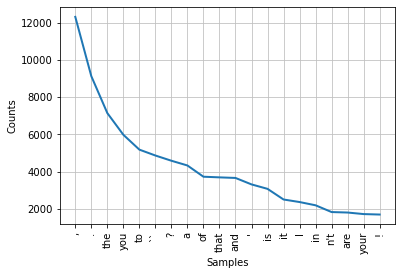



Gráfico de las 20 palabras no sarcásticas más frecuentes



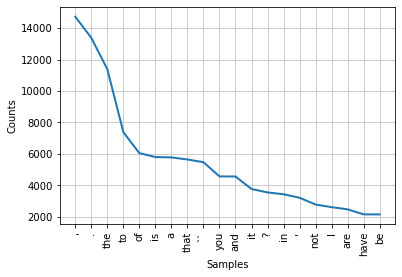

In [8]:
# A partir de estas listas de palabras horripilante, puedo obtener mis primeros resultados estadísticos
# interesantes. Uno de ellos es la Frecuencia de una palabra. La función me devuelve un diccionario donde 
# por un lado tengo el término y por otro tengo la cantidad de veces que aparece en el documento.

print("\nGráfico de las 20 palabras sarcásticas más frecuentes\n")
fdist1_sarc = FreqDist(word_tokens_sarc) 
fdist1_sarc.plot(20)

print("\n\nGráfico de las 20 palabras no sarcásticas más frecuentes\n")
fdist1_nosarc = FreqDist(word_tokens_nosarc) 
fdist1_nosarc.plot(20)

#### Observación:
El problema con esto es que los corpus tienen una embergadura distinta, es decir no tienen la misma cantidad de courrencias o casos de análisis. A primera vista hay una mayor cantidad de comentarios sarcásticos que no sarcasticos, que podrían explicar a primera vista la ocurrencia de algunas palabras sobre otras. Por esto utilizamos una función que compara las frecuencias entre corpuspeor normalizando las frecuencias entre 0 y 1.


In [9]:
def compa_frec(a_list, b_list, a_label, b_label, a_color, b_color, term=20):
    '''funcion que devuelve un grafico comparando las frecuencia de los términos normalizadas  de
    dos muestras distintas. a_list y b_list tienen que ser dict, type, label y color son str type. 
    term el por defaultt 20''' 
    
    most_common_a = a_list.most_common(term)
    most_common_words_a = [x for x, y in most_common_a]    
  
    #la frecuencia de los terminos mas frecuentes en a comparados con sus ocurrencias en b
    norm_freqs_a = [y/sum(a_list.values()) for x, y in most_common_a]
    norm_freqs_a_b = [y/sum(b_list.values()) for x, y in most_common_a]
         
    a_graf = sns.lineplot(
        x=most_common_words_a,
        y=norm_freqs_a,
        label=a_label,
        sort=False,
        color=a_color
    )
    b_graf = sns.lineplot(
        x=most_common_words_a,
        y=norm_freqs_a_b,
        label=b_label,
        sort=False,
        color=b_color
    )
    rot_lab_ns = a_graf.set_xticklabels(
        labels=most_common_words_a, rotation=90)

Text(0.5, 1.0, '\nComparación entre las 20 palabras más comunes sarcásticas y no sarcásticas\n')

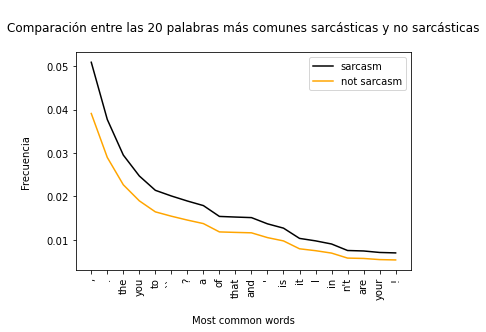

In [10]:
compa_frec(
    fdist1_sarc, fdist1_nosarc,
    "sarcasm", "not sarcasm",
    "black", "orange",
)
plt.ylabel("Frecuencia\n")
plt.xlabel("\nMost common words")
plt.title("\nComparación entre las 20 palabras más comunes sarcásticas y no sarcásticas\n")

Text(0.5, 1.0, '\nComparación entre las 20 palabras más comunes no sarcasticas y  sarcásticas\n')

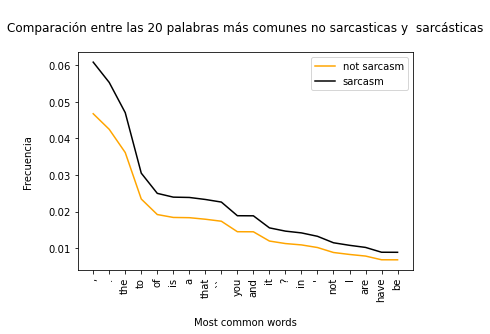

In [11]:
compa_frec(
    fdist1_nosarc, fdist1_sarc,
     "not sarcasm", "sarcasm",
     "orange", "black"
)
plt.ylabel("Frecuencia\n")
plt.xlabel("\nMost common words")
plt.title("\nComparación entre las 20 palabras más comunes no sarcasticas y  sarcásticas\n")

#### Observación:
Con los gráficos anteriores se puede ver que las palabras más comunes son aquellas que en la lengua inglesa se utilizan frecuentemente, pero que no aportan información relvante para el objetivo de nuestro análisis en este práctico. Como por ejemplo, "to", "of", "is", entre otras.

Para ello trataremos de limpiar aquellos términos que generan "ruido" en el análisis, llamadas stopwords.

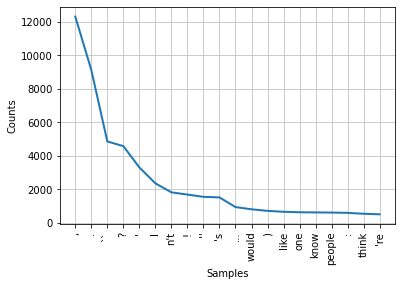

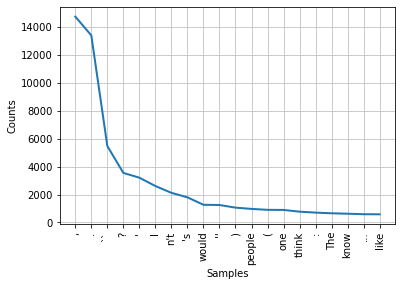

In [12]:
stop_words_sarc = set(stopwords.words('english'))
filtered_corpus_sarc = []

for w in word_tokens_sarc:
    if w not in stop_words_sarc:
        filtered_corpus_sarc.append(w)
        
#Si analizamos la frecuencia del corpus filtrado vemos que han desaparecido todas esas palabras molestas.
fdist2_sarc = FreqDist(filtered_corpus_sarc) 
fdist2_sarc.plot(20)

stop_words_nosarc = set(stopwords.words('english'))
filtered_corpus_nosarc = []

# Realizamos lo mismo para las palabras no sarcásticas.

for w in word_tokens_nosarc:
    if w not in stop_words_nosarc:
        filtered_corpus_nosarc.append(w)
        
fdist2_nosarc = FreqDist(filtered_corpus_nosarc) 
fdist2_nosarc.plot(20)

Realizamos la comparación en un mismo gráfico que normalice las funciones para una mejor visualización.

Text(0.5, 1.0, '\nComparación entre términos sarcásticos y no sarcásticos sin stopwords\n')

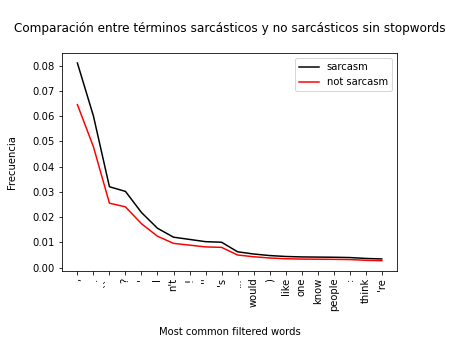

In [13]:
compa_frec(
    fdist2_sarc, fdist2_nosarc,
    "sarcasm", "not sarcasm",
    "black", "red",
)
plt.ylabel("Frecuencia\n")
plt.xlabel("\nMost common filtered words")
plt.title("\nComparación entre términos sarcásticos y no sarcásticos sin stopwords\n")



Text(0.5, 1.0, '\nComparación entre términos no sarcásticos y sarcásticos sin stopwords\n')

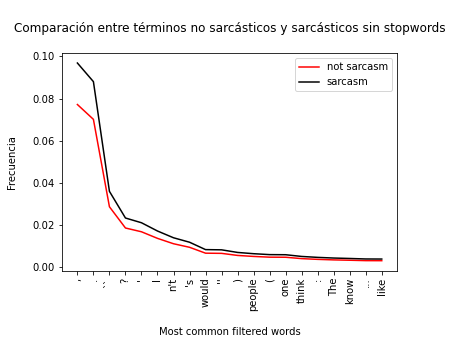

In [14]:
compa_frec(
     fdist2_nosarc, fdist2_sarc,
     "not sarcasm","sarcasm",
     "red", "black"
)
plt.ylabel("Frecuencia\n")
plt.xlabel("\nMost common filtered words")
plt.title("\nComparación entre términos no sarcásticos y sarcásticos sin stopwords\n")

Vemos que globalmente el peso de las freucuencias normalizadas ha aumentado.Sin embargo, parecen haber muchas ocurrencias de palabras y caracteres que tal vez no sean relevantes. Para ello, se analizarán aquellas palabras que se componen por más de 2 caracteres, excluyendo solo los signos de exclamación y pregunta.

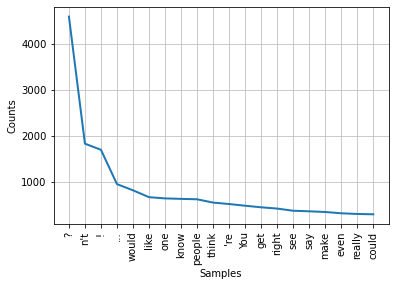

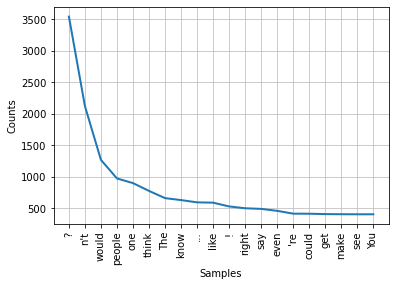

In [15]:
long_words_sarc = [w for w in filtered_corpus_sarc if (len(w) > 2)] + [w for w in filtered_corpus_sarc if (w == '!') | (w == '?')]
fdist3_sarc = FreqDist(long_words_sarc)
fdist3_sarc.plot(20)

long_words_nosarc = [w for w in filtered_corpus_nosarc if len(w) > 2] + [w for w in filtered_corpus_nosarc if (w == '!') | (w == '?')]
fdist3_nosarc = FreqDist(long_words_nosarc)
fdist3_nosarc.plot(20)

Comparamos frecuencias normalizadas.

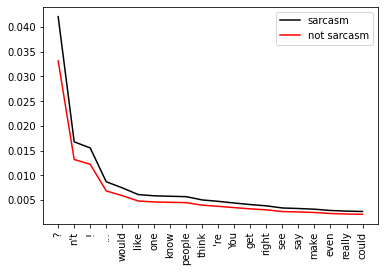

In [16]:
compa_frec(
    fdist3_sarc, fdist3_nosarc,
    "sarcasm", "not sarcasm",
    "black", "red",
)

#### Observación:
Se puede ver que las palabras que aparecían con mayor frecuencia eran aquellas que tenían entre 1 y 2 caracteres o sino signos especiales, las mismas no aportaban una importancia significativa a nuestro análisis y por eso consideramos que deberían ser filtradas. 

Se puede ver que en los gráficos ateriores las frecuencias de apariciones de palabras comenzaban con aproximadamente 12000 y 14000 apariciones para el caso de sarcasmo y no sarcasmo respectivamente. Una vez que se realizó el filtrado de las mismas, las mayores frecuencias se redujeron a 4500 y 3500 aparecines respectivamente. El conjunto total de ocurrencias se redujo y con llo también el peso de las frecuencias de las palabras que permanecieron en el dataset.

#### Discusión:
En este punto se consideró qué tanto los signos de admiración como de exclamación son relevantes para el trabajo. Se hipotetizó que la gran cantidad de ocurrencias de estos tal vez sean indicativo de que  cuando se escribe de manera sarcástica en el idioma inglés se emplea característicamente el uso de dichos signos y es por ello que podrían marcar una diferencia entre comentarios sarcásticos de los que no. 

Se puede ver una frecuencia del signo de exclamación de 4585 para el caso del sarcasmo y 3545 para el caso del no sarcasmo, y para el signo de admiración 1692 y 526 apariciones respectivamente. Se puede ver una diferencia de casi mil apariciones más para el sarcasmo que para el no sarcasmo, lo que podría denotar alguna "tendencia" del uso de los signos para hablar de manera sarcástica. Sin embargo, una vez que tenemos los datos normalizados estos pesos se relativizan, por un lado. Además el número de ocurrencias sigue sin representar un porcentaje mayoritariod ocurrencias en toda la lista de sarcasmo (su peso oscila entre 0.01 y 0.02).

Además tenemos conocimiento de que los algoritmos no toman en cuenta este tipo de signos en sus análisis por lo general. Podríamos decir que dependiendo el trasfondo teórico "lingüístico" con el que nos comprometamos, bien podríamos optar por un modelo para el cual los signos no son relevantes. 
En este práctico los tendremos en cuenta, y a medida que se realicen análisis más profundos se podrá decidir si son relevantes o es mejor filtrarlos.

Ahora definiremos un nuevo dataset que agrupe a las palabras y se evidencien las frecuencias de las mismas. Esto permitirá visualizar de manera más cómoda y ordenada en una tabla la frecuencia de las mismas.

In [17]:
df_fdist_sarc = pd.DataFrame.from_dict(fdist3_sarc, orient='index')
df_fdist_sarc.columns = ['Frequency Sarc']
df_fdist_sarc.index.name = 'Term'
print(df_fdist_sarc.sort_values(by='Frequency Sarc', ascending=False))
# Veamos también algunos estadísticos.
df_fdist_sarc.describe()

             Frequency Sarc
Term                       
?                      4585
n't                    1826
!                      1692
...                     947
would                   813
...                     ...
Apes                      1
crock                     1
wail                      1
committee                 1
fore-headed               1

[18860 rows x 1 columns]


,Frequency Sarc
count,18860.000000
mean,5.773542
std,43.836329
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4585.000000


In [18]:
# Dataset para el no sarcasmo.
df_fdist_nosarc = pd.DataFrame.from_dict(fdist3_nosarc, orient='index')
df_fdist_nosarc.columns = ['Frequency No-Sarc']
df_fdist_nosarc.index.name = 'Term'
print(df_fdist_nosarc.sort_values(by='Frequency No-Sarc', ascending=False))
# Veamos también algunos estadísticos.
df_fdist_nosarc.describe()

            Frequency No-Sarc
Term                         
?                        3545
n't                      2120
would                    1266
people                    971
one                       897
...                       ...
'gospels                    1
unearthed                   1
Focusing                    1
burying                     1
engineered                  1

[20075 rows x 1 columns]


,Frequency No-Sarc
count,20075.000000
mean,6.889813
std,40.118573
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,3545.000000


Podríamos probar filtrar el dataset de aquellas palabras que solo aparecen una vez, a ver que sucede.



In [19]:
#Sarcamo
one_time_words = df_fdist_sarc['Frequency Sarc']!= 1
df_two_words = df_fdist_sarc[one_time_words].sort_values(by='Frequency Sarc', ascending=False)
print(df_two_words.sort_values(by='Frequency Sarc', ascending=False))
df_two_words.describe()

           Frequency Sarc
Term                     
?                    4585
n't                  1826
!                    1692
...                   947
would                 813
...                   ...
downright               2
condone                 2
peers                   2
cheat                   2
lacing                  2

[8659 rows x 1 columns]


,Frequency Sarc
count,8659.000000
mean,11.397159
std,64.243571
min,2.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,4585.000000


In [20]:
# No sarcasmo.
one_time_wordn = df_fdist_nosarc['Frequency No-Sarc']!= 1
df_two_wordn = df_fdist_nosarc[one_time_wordn].sort_values(by='Frequency No-Sarc', ascending=False)
print(df_two_wordn.sort_values(by='Frequency No-Sarc', ascending=False))
df_two_wordn.describe()

               Frequency No-Sarc
Term                            
?                           3545
n't                         2120
would                       1266
people                       971
one                          897
...                          ...
fixing                         2
unchanging                     2
locks                          2
effectiveness                  2
callously                      2

[9162 rows x 1 columns]


,Frequency No-Sarc
count,9162.000000
mean,13.905261
std,58.619649
min,2.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,3545.000000


#### Observación:
A través de los análisis anteriores, se puede visualizar que para ambos casos, más de la mitad de las palabras aparecen solo una vez. Para el sarcasmo antes había una totalidad de 18860 palabras y cuando se filtaron aquellas que aparecían una sola vez el dataset se redujo a una totalidad de 8659 palabras. Con respecto al no sarcasmo, al principio había 20075 palabras y luego del filtro se redujeron a 9162 palabras en total.

Se decidió continuar con el dataset filtrado ya que esas palabras que aparecían una sola vez tiene un peso insignificante a esta altura por su frecuencia en el dataset. En función de este último dataset podemos definir la ocurrencia de las palbras como:
     baja, si ocurre entre 2 y 6 veces; media, si ocurre entre 6 y 10; y alta si ocurre mas de 10 veces.

In [21]:
# Sarcasmo
bins = pd.IntervalIndex.from_tuples([(1, 5), (6, 10), (11, 5000)], )
d = dict(zip(bins,["baja", "media", "alta"]))
cat_series = pd.cut(df_two_words['Frequency Sarc'], bins).map(d)
# No sarcasmo
cat_serien = pd.cut(df_two_wordn['Frequency No-Sarc'], bins).map(d)

df_two_word_2 = pd.concat([df_two_words, cat_series, df_two_wordn, cat_serien], axis=1)
df_two_word_2.columns = ['Frecuencia_num_Sarc', 'Frecuencia_cat_Sarc','Frecuencia_num_NoSarc', 'Frecuencia_cat_NoSarc']
df_two_word_2

,Frecuencia_num_Sarc,Frecuencia_cat_Sarc,Frecuencia_num_NoSarc,Frecuencia_cat_NoSarc
?,4585.0,alta,3545.0,alta
n't,1826.0,alta,2120.0,alta
!,1692.0,alta,526.0,alta
...,947.0,alta,591.0,alta
would,813.0,alta,1266.0,alta
...,...,...,...,...
Viability,NaN,NaN,2.0,baja
eradicated,NaN,NaN,2.0,baja
new-born,NaN,NaN,2.0,baja
afflicted,NaN,NaN,2.0,baja


Ahora podemos hacer un gráfico simple de conteo sobre la variable Frecuencia_cat y Frecuencia_cat_NoSarc.

Text(0, 0.5, 'Frecuencia_cat_NoSarc\n')

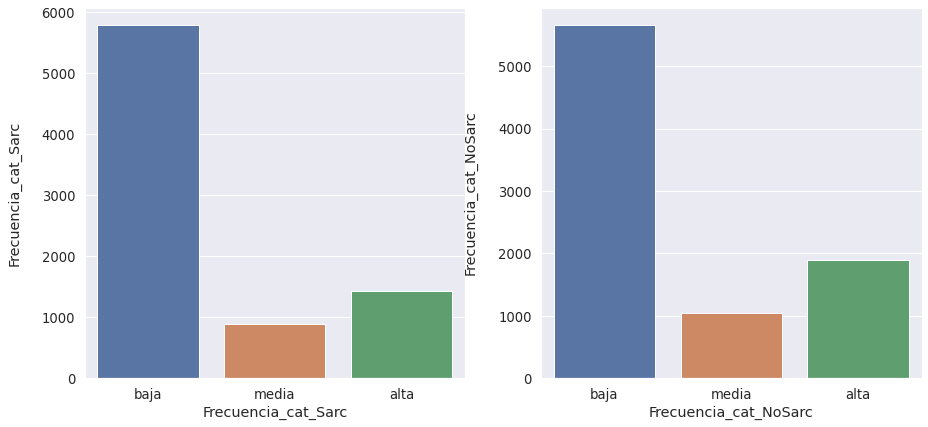

In [22]:
sns.set(font_scale=1.2) 
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1), sns.countplot(data=df_two_word_2, x='Frecuencia_cat_Sarc')
plt.ylabel("Frecuencia_cat_Sarc\n")
plt.subplot(2, 2, 2), sns.countplot(data=df_two_word_2, x='Frecuencia_cat_NoSarc')
plt.ylabel("Frecuencia_cat_NoSarc\n")

Podemos realizar otros tipos de visualizaciones como heatmaps para correlacionar las variables en nuestro nuevo dataset.

Text(0.5, 1.0, 'Heatmap entre las frecuencias de las palabras sarcásticas y no sarcásticas\n')

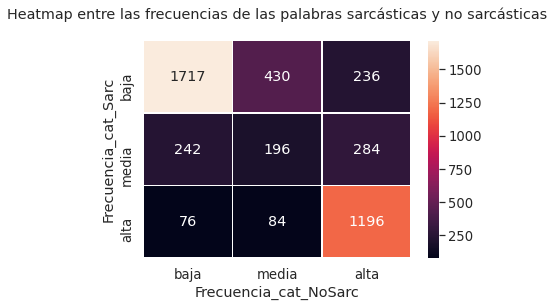

In [23]:
heat = pd.crosstab(df_two_word_2.Frecuencia_cat_Sarc, df_two_word_2.Frecuencia_cat_NoSarc, normalize = False)
sns.heatmap(heat, annot=True, fmt="d", linewidths=.5)
plt.title("Heatmap entre las frecuencias de las palabras sarcásticas y no sarcásticas\n")

#### Observación final:
Se puede ver que, a pesar de que se filtraron las palabras que aparecían una sola vez, la mayoría de las palabras tienen una frecuencia de aparición baja.
Ademas, y a priori, es muy dificil apra el ojo humano poder tomar una decisi'on al repecto de la importancia de las palabras solo con ver el corpus meramente tokenizado.
Nuestro método de trabajo supuso fusionar todos los documento del corpora en un solo corpus. Esto a su vez puede hacer que  información crítica quede relegada: después de todo cada ocurrencia es en sí misma el comentario sarcástico a analizar y este tipo de análisis no pareciera aportar nada en ese nival propiamente dicho.